# The aim of the project is to build a machine learning model that will identify customers that are eligible for loan or not.

In [1]:
#importing the necessary library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('loan_data_set.csv') #read in the dataset

In [86]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


# Cleaning Stage

In [3]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#The function will replace null values in numerical columns with mean and objects columns with none
for i in df.columns:
    if df[i].dtype is np.dtype(float):
        df[i].fillna(df[i].mean(),inplace=True)
    elif df[i].dtype is np.dtype(object):
        df[i].fillna('none',inplace=True)
    


In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [5]:
#Changing our dependent variable to integer type
df["Loan_Status"] = df["Loan_Status"].map({"Y" : 0 ,"N" : 1})

In [6]:
#this will drop the predicted column from the dataframe
Loan_Label=df["Loan_Status"] 
df1=df.copy()
df.drop(['Loan_Status','Loan_ID'],axis=1,inplace=True)

In [155]:

df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

# Performing Exploratory Data Analysis On The Dataframe

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

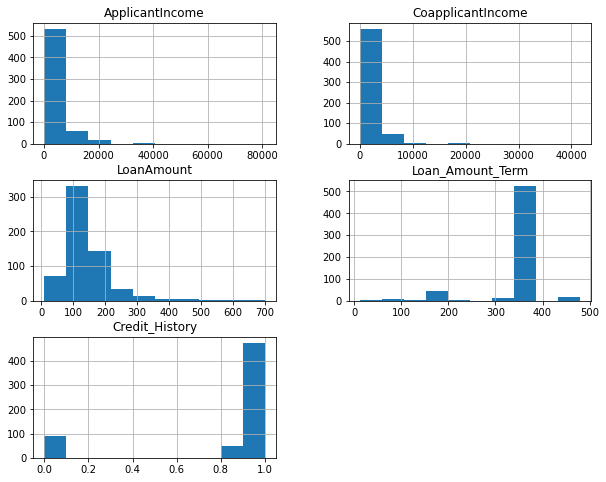

In [7]:
df.hist(figsize=[10,8])

In [8]:
#This code will check for skewed columns
skew_value = []    
for col in df.select_dtypes('number'):
    skew_col = df[col].skew()
    skew_value.append((col , skew_col))
    sorted(skew_value , key = lambda x : x[1] , reverse = True)

In [14]:
skew_value

[('ApplicantIncome', 6.539513113994625),
 ('CoapplicantIncome', 7.491531216657306),
 ('LoanAmount', 2.726601144105299),
 ('Loan_Amount_Term', -2.3896799467122745),
 ('Credit_History', -1.963600485467902)]

In [9]:
skew_values=['ApplicantIncome','CoapplicantIncome']

In [10]:
#This cide will correct the skewness in the skewed column
df = df[skew_values].apply(lambda x : np.log(x+1))

In [11]:
#This code will check for columns with outlier
def outliers_check():
        cols_store = []
    
        for col in df.select_dtypes("number"): 
            q1 = df[col].quantile(.25)
            q3 = df[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                cols_store.append(col)

        return cols_store

In [12]:
outlier_col = outliers_check()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [14]:
#Removing the outliers in the columns with standard scaler
df[outlier_col] = scaler.fit_transform(df[outlier_col])

# Splitting The Dataset into training and testing

In [15]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(df , Loan_Label, test_size= .2)

# Training our model on the Dataset

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [18]:
Model = LogisticRegression()

In [19]:
def Eval(Model , data):
    Model = Model.fit(X_train , Y_train)
    Model_predict_train = Model.predict(X_train[:data])
    Model_predict_test = Model.predict(X_test[:data])
    
    accuracy_score_train = accuracy_score(Model_predict_train , Y_train[:data])
    accuracy_score_test = accuracy_score(Model_predict_test , Y_test[:data])
       
    print (f"The model has an accuracy score  of {accuracy_score_train} on training and {accuracy_score_test} on testing ")

In [20]:
Eval(Model ,614)

The model has an accuracy score  of 0.6822810590631364 on training and 0.7073170731707317 on testing 


In [21]:
Model = DecisionTreeClassifier()
Model2 = RandomForestClassifier()
Model3=LogisticRegression()
Model4=SVC()

In [22]:
Eval(Model , 614)

The model has an accuracy score  of 0.9898167006109979 on training and 0.6016260162601627 on testing 


In [23]:
Eval(Model2 , 614)

The model has an accuracy score  of 0.9898167006109979 on training and 0.6178861788617886 on testing 


In [24]:
Eval(Model3 , 614)

The model has an accuracy score  of 0.6822810590631364 on training and 0.7073170731707317 on testing 


In [25]:
Eval(Model4 , 614)

The model has an accuracy score  of 0.6822810590631364 on training and 0.7073170731707317 on testing 


In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [27]:
cross_val_score(Model , X_train ,Y_train ,  cv = 3, scoring="accuracy")

array([0.55487805, 0.62804878, 0.57668712])

In [36]:
cross_val_score(Model , X_train ,Y_train ,  cv = 3, scoring="accuracy")

array([0.56707317, 0.60365854, 0.58282209])

In [30]:
cross_val_score(Model , X_train ,Y_train ,  cv = 3, scoring="accuracy")

array([0.56707317, 0.6097561 , 0.57055215])

In [32]:
Y_predict = cross_val_predict(Model , X_test , Y_test , cv = 3 )

In [33]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

In [34]:
precision_score(Y_predict , Y_test)

0.2777777777777778

In [35]:
confusion_matrix(Y_predict , Y_test)

array([[64, 26],
       [23, 10]], dtype=int64)

In [38]:
from sklearn.model_selection import GridSearchCV

In [40]:
param_grid = {"n_estimators":[30,33,60], "max_depth":[2,4,6],
              "min_samples_split":[4],"bootstrap" : [True,None]}

In [41]:
param_grid = {"n_estimators":[30,33,60], "max_depth":[2,4,6],
              "min_samples_split":[4],"bootstrap" : [True,None]}